In [1]:
import pandas as pd

data = pd.read_csv('data/Loan Eligibility Prediction.csv')
data.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


<Axes: >

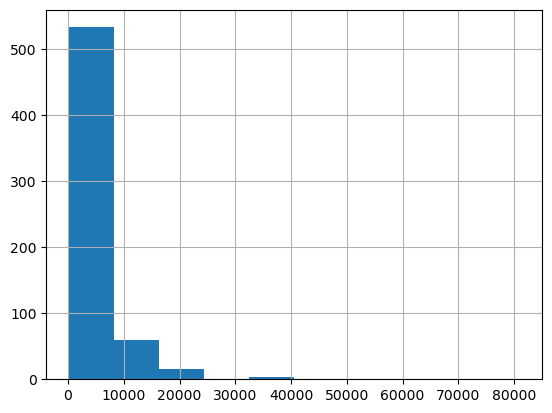

In [2]:
data['Applicant_Income'].hist()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_ID,614.0,NaN,NaN,NaN,307.5,177.3908,1.0,154.25,307.5,460.75,614.0
Gender,614,2,Male,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,614,2,Yes,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,614.0,NaN,NaN,NaN,0.8567,1.2167,0.0,0.0,0.0,2.0,4.0
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,614,2,No,523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Applicant_Income,614.0,NaN,NaN,NaN,5403.4593,6109.0417,150.0,2877.5,3812.5,5795.0,81000.0
Coapplicant_Income,614.0,NaN,NaN,NaN,1621.2458,2926.2484,0.0,0.0,1188.5,2297.25,41667.0
Loan_Amount,614.0,NaN,NaN,NaN,142.0228,87.0831,9.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,614.0,NaN,NaN,NaN,338.8925,69.7164,12.0,360.0,360.0,360.0,480.0


In [5]:
# feature types

numerical_features = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term']
categorical_features = ['Property_Area', 'Dependents']
binary_features = ['Credit_History', 'Gender', 'Married', 'Education', 'Self_Employed']
drop_features = ['Customer_ID']
target = ['Loan_Status']

In [6]:
# check for missing values
pd.DataFrame(data.isna().sum(), columns=['missing_values'])

,missing_values
Customer_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Applicant_Income,0
Coapplicant_Income,0
Loan_Amount,0
Loan_Amount_Term,0


In [7]:
# distribution of target
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [12]:
# feature distribution across classes

import altair as alt
import pandas as pd
from typing import List

def plot_feature_boxplot_across_classes(
        data: pd.DataFrame,
        column_names: List[str],
        number_of_columns: int = 3,
        target: str = ""
    ) -> alt.Chart:

    if target not in data.columns:
        raise ValueError(f"Target '{target}' not found.")

    long_df = (
        data[column_names + [target]]
        .melt(id_vars=[target], var_name="feature", value_name="value")
    )

    base = alt.Chart(long_df).properties(width=180, height=140)

    chart = (
        base.mark_boxplot()
        .encode(
            x=alt.X(f"{target}:N", title=target),
            y=alt.Y("value:Q", title="Value"),
            color=alt.Color(f"{target}:N")
        )
    )

    final = (
        chart
        .facet(column="feature:N", columns=number_of_columns)
        .resolve_scale(y="independent")     
        .properties(title="Boxplots of Selected Features across Classes")
    )

    return final


plot_feature_boxplot_across_classes(
    data=data,
    column_names=numerical_features,
    number_of_columns=2,
    target=target[0]
)

alt.FacetChart(...)

In [19]:
import altair as alt
import pandas as pd
from typing import List

def univariate_feature_distributions(
        data: pd.DataFrame,
        column_names: List[str],
        bins: int = 30
    ) -> alt.Chart:
    """
    Plot univariate histograms for the given columns.
    Each feature gets its own histogram with its own x/y scale and a title.
    Charts are concatenated horizontally.
    """

    for col in column_names:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

    charts = []
    for col in column_names:
        ch = (
            alt.Chart(data)
            .mark_bar()
            .encode(
                x=alt.X(
                    f"{col}:Q",
                    bin=alt.Bin(maxbins=bins),
                    title="Value",
                    scale=alt.Scale(zero=False)  
                ),
                y=alt.Y(
                    "count():Q",
                    title="Count",
                    scale=alt.Scale(zero=False)
                )
            )
            .properties(
                title=col,
                width=150,
                height=120
            )
        )
        charts.append(ch)

    if len(charts) == 1:
        return charts[0]
    else:
        return alt.hconcat(*charts).properties(
            title="Univariate Feature Distributions"
        )
        
univariate_feature_distributions(
    data=data,
    column_names=numerical_features
)

alt.HConcatChart(...)